In [65]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

Определим функцию для обучения и параметры сети

In [76]:
function_to_learn = lambda x: (np.sin(x) + np.cos(x))
NUM_EXAMPLES = 1500
TRAIN_SPLIT = 0.8
NUM_HIDDEN_NODES = 20
MINI_BATCH_SIZE = 100
NUM_EPOCHS = 1000

Сгенерируем данные для обучения

In [77]:
np.random.seed(420)
all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_EXAMPLES))).T
np.random.shuffle(all_x)

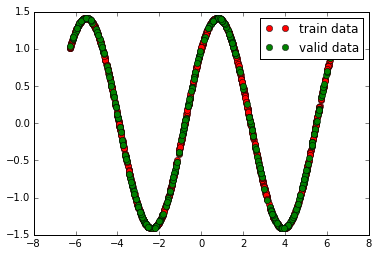

In [78]:
train_size = int(NUM_EXAMPLES*TRAIN_SPLIT)
trainx = all_x[:train_size]
validx = all_x[train_size:]
trainy = function_to_learn(trainx)
validy = function_to_learn(validx)
plt.plot(trainx, trainy, 'ro', label='train data')
plt.plot(validx, validy, 'go', label='valid data')
plt.legend()
plt.show()

In [79]:
X = tf.placeholder(tf.float32, [None, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

Определим функцию для инициализации весов и порогов

In [80]:
def init_weights(shape, init_method='uniform', xavier_params=(None,None)):
    if init_method=='zeros':
        return tf.Variable(tf.zeros(shape,dtype=tf.float32))
    elif init_method=='uniform':
        return tf.Variable(tf.random_normal(shape, stddev=0.01, dtype=float32))
    else: #xavier
        (fan_in, fan_out) = xavier_params
        k = 4 # {sigmoid: 4, tanh:1}
        high = k*np.sqrt(6.0/(fan_in + fan_out)) 
        low = -high
        return tf.Variable(tf.random_uniform(shape, minval=low, maxval=high, dtype=tf.float32))        

Определим модель сети (1 нейрон на входе, num_hiddens нейронов на скрытом слое и 1 на выходе)

In [81]:
def model(X, num_hidden=10):    
    w_h = init_weights([1, num_hidden], 'xavier', xavier_params=(1, num_hidden))
    b_h = init_weights([1, num_hidden], 'zeros')
    h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)
    
    w_o = init_weights([num_hidden, 1], 'xavier', xavier_params=(num_hidden, 1))
    b_o = init_weights([1, 1], 'zeros')
    
    return tf.matmul(h, w_o) + b_o

In [82]:
yhat = model(X, NUM_HIDDEN_NODES)

train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(yhat - Y))

In [83]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Обучим сеть, выводя информацию о ходе обучения (значение ошибки l2_loss = x**2 / 2)

epoch: 0, validation MSE 800.785
epoch: 100, validation MSE 61.9199
epoch: 200, validation MSE 44.0944
epoch: 300, validation MSE 32.1642
epoch: 400, validation MSE 24.5422
epoch: 500, validation MSE 17.0525
epoch: 600, validation MSE 11.5904
epoch: 700, validation MSE 7.26909
epoch: 800, validation MSE 4.27929
epoch: 900, validation MSE 2.53351


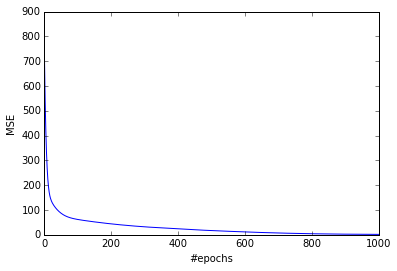

In [84]:
errors = []
for i in range(NUM_EPOCHS):
    for start, end in zip(range(0, len(trainx), MINI_BATCH_SIZE), range(MINI_BATCH_SIZE, len(trainx), MINI_BATCH_SIZE)):
        sess.run(train_op, feed_dict={X: trainx[start:end], Y: trainy[start:end]})
    mse = sess.run(tf.nn.l2_loss(yhat - validy), feed_dict={X: validx})
    errors.append(mse)
    if i % 100 == 0:
        print "epoch: %d, validation MSE %g" % (i, mse)
plt.plot(errors)
plt.xlabel('#epochs')
plt.ylabel('MSE')

Сравним результаты работы сети с проверочными данными

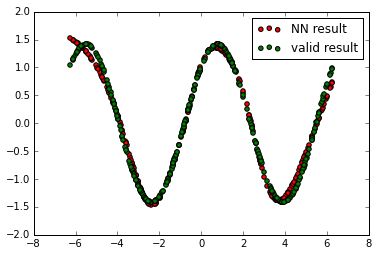

In [85]:
test_result = sess.run(yhat, feed_dict={X: validx})
plt.figure(1)
plt.scatter(validx,test_result, c='red', label='NN result')
plt.scatter(validx,validy, c='green', label='valid result')
plt.legend()

Некоторые способы работы с пакетом TensorFlow и некоторые части программного кода были взяты с сайта: http://deliprao.com/archives/100